In [ ]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.cluster import KMeans, OPTICS, SpectralClustering, AgglomerativeClustering, DBSCAN, MeanShift, AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
import hdbscan


/Users/ksarma/mlops-course/.venv/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


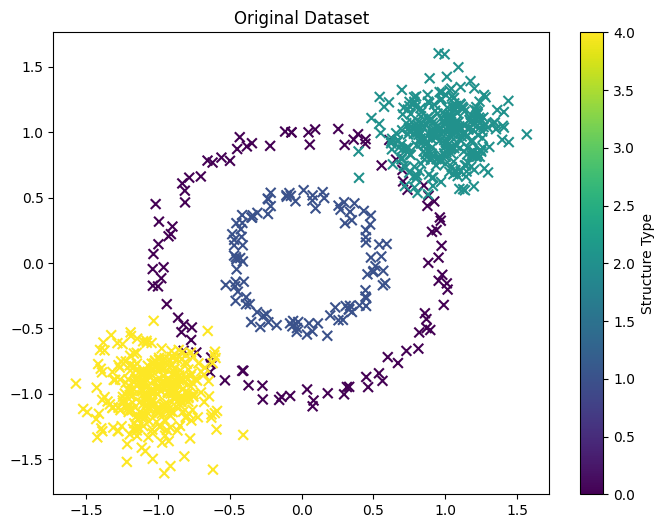

In [18]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt

# Generate the different structures
X1, y1 = make_circles(n_samples=200, factor=.5, noise=.05)
# Keep original labels (0 and 1) for inner and outer circles

X2, y2 = make_blobs(n_samples=300, centers=[(1,1)], cluster_std=0.2)
y2 = 2 * np.ones(len(y2))  # Assign label 2 for top-right blob

# X3, y3 = make_moons(n_samples=200, noise=0.05)
# y3 = 3 * np.ones(len(y3))  # Assign label 3 for moons

X4, y4 = make_blobs(n_samples=300, centers=[(-1,-1)], cluster_std=0.2)
y4 = 4 * np.ones(len(y4))  # Assign label 4 for bottom-left blob

# Combine all structures into a single dataset
X_large = np.vstack((X1, X2, X4))
y_large = np.concatenate((y1, y2, y4))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=y_large, s=50, cmap='viridis', marker='x')
plt.title('Original Dataset')
plt.colorbar(label='Structure Type')
plt.show()

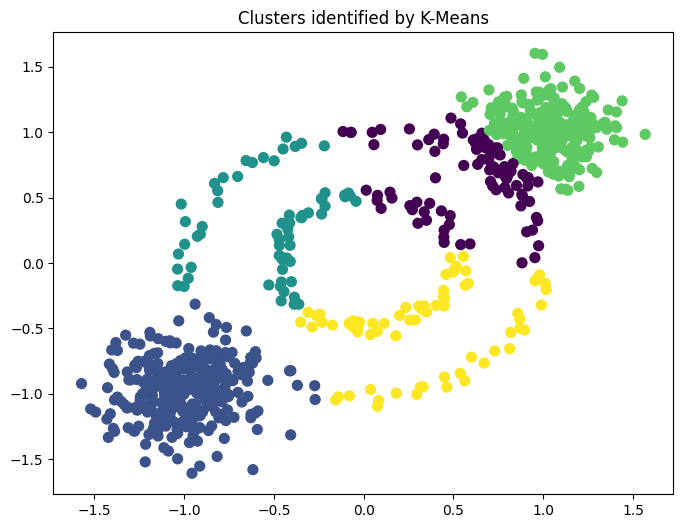

In [19]:
from sklearn.cluster import KMeans

# Apply the KMeans algorithm
clustering_kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the data
clustering_kmeans.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_kmeans.labels_, s=50, cmap='viridis')
plt.title('Clusters identified by K-Means')
plt.show()

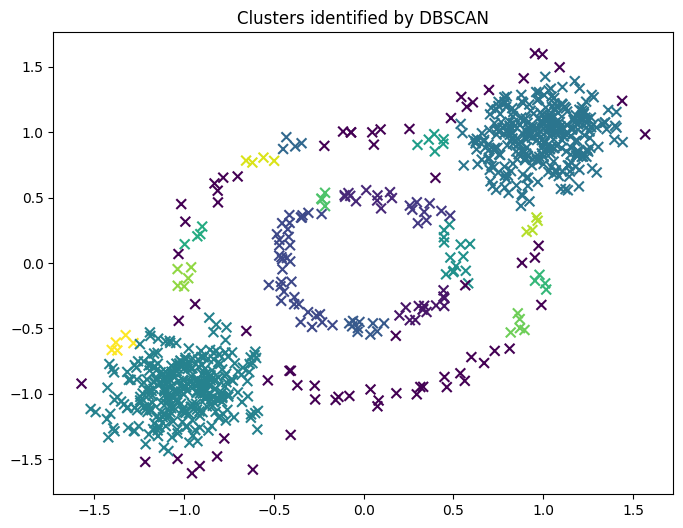

In [44]:
from sklearn.cluster import DBSCAN

# Apply the DBSCAN algorithm
clustering_dbscan = DBSCAN(eps=0.1, min_samples=4)

# Fit the data
clustering_dbscan.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_dbscan.labels_, s=50, cmap='viridis', marker='x')
plt.title('Clusters identified by DBSCAN')
plt.show()

# scale and density invariant - HDBSCAN

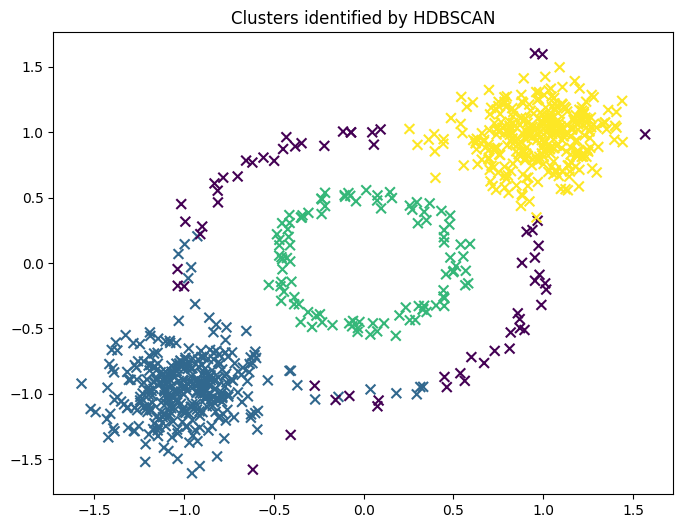

In [28]:
# Apply the HDBSCAN algorithm
clustering_hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10)

# Fit the data
clustering_hdbscan.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_hdbscan.labels_, s=50, cmap='viridis', marker='x')
plt.title('Clusters identified by HDBSCAN')
plt.show()

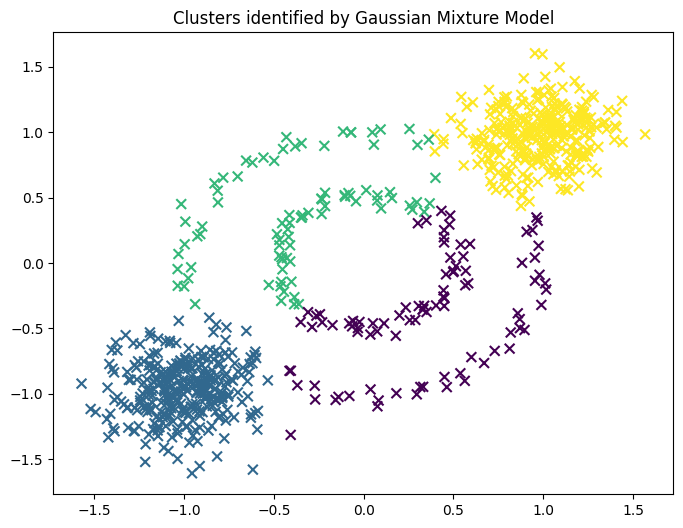

In [45]:
from sklearn.mixture import GaussianMixture
# Cluster Shapes in GMM
# In GMM, each cluster is a Gaussian defined by:

# Mean (μ): Center of the cluster.
# Covariance (Σ): Controls the shape, orientation and spread of the cluster.

# Apply the Gaussian Mixture Model algorithm
clustering_gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the data and predict
clustering_gmm.fit(X_large)
labels_gmm = clustering_gmm.predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_gmm, s=50, cmap='viridis', marker='x')
plt.title('Clusters identified by Gaussian Mixture Model')
plt.show()

## Clustering Algorithms Summary

| Algorithm | Description | Parameters | Pros | Cons |
| :--- | :--- | :--- | :--- | :--- |
| **K-Means** | Partitions the data into $K$ clusters, each represented by the mean of the samples in the cluster. | n\_clusters, init, max\_iter | Simple and fast, works well on large datasets. | Assumes clusters are spherical and equally sized, which may not always be the case. |
| **Agglomerative Hierarchical Clustering** | Builds a hierarchy of clusters by merging or splitting existing clusters. | n\_clusters, affinity, memory, connectivity, compute\_full\_tree, linkage, distance\_threshold | Does not require the number of clusters to be specified, can produce a hierarchy of clusters. | Can be slow on large datasets, sensitive to the choice of linkage criteria. |
| **DBSCAN** | Forms clusters by connecting samples within a certain distance range. | min\_samples, max\_eps, metric, $p$, cluster\_method, eps, $xi$, predecessor\_correction | Does not require the user to set the number of clusters. | Does not work well with high-dimensional data. |
| **HDBSCAN** | Hierarchical version of DBSCAN, which allows a hierarchy of clusters, similar to agglomerative clustering. | min\_cluster\_size, min\_samples, alpha, cluster\_selection\_method, allow\_single\_cluster | Does not require the user to set the number of clusters, and can find clusters of varying densities. | May be slower than other methods on large datasets. |
| **Gaussian Mixture Models (GMM)** | Models the data as a collection of Gaussian distributions. | n\_components, covariance\_type, tol, reg\_covar, max\_iter, n\_init, init\_params, weights\_init, means\_init, precisions\_init | Works well with data that is distributed as a mixture of Gaussians. | Requires the number of Gaussian components to be specified. |


# LDA and ISOMAP

Original shape: (1797, 64)
Number of classes: 10


/Users/ksarma/mlops-course/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


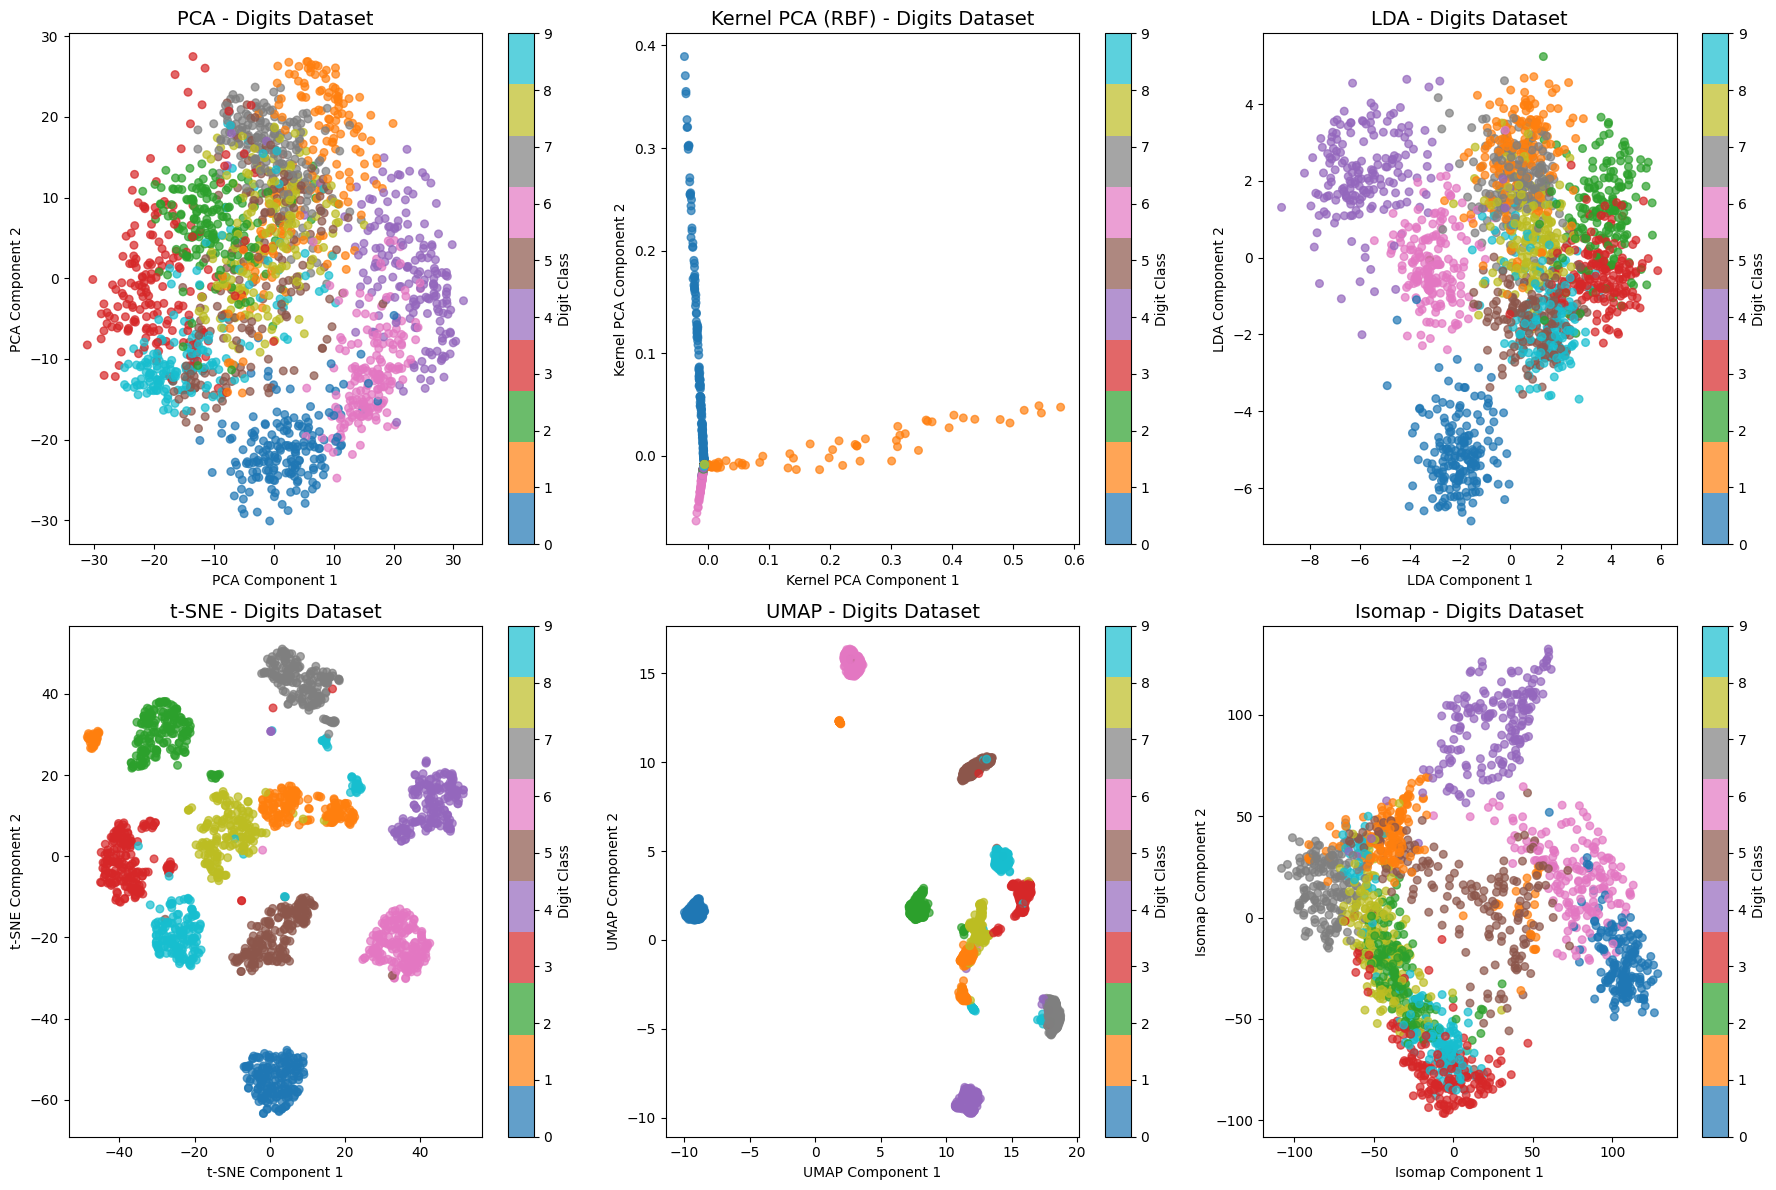

In [46]:
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, TSNE
from sklearn.decomposition import PCA, KernelPCA
import umap

# Load the digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Original shape: {X_digits.shape}")
print(f"Number of classes: {len(np.unique(y_digits))}")

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_digits)

# Apply Kernel PCA for dimensionality reduction
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01, random_state=42)
X_kpca = kpca.fit_transform(X_digits)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_digits, y_digits)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_digits)

# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
X_umap = umap_reducer.fit_transform(X_digits)

# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_digits)

# Visualize all methods
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# PCA
scatter = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[0, 0].set_title('PCA - Digits Dataset', fontsize=14)
axes[0, 0].set_xlabel('PCA Component 1')
axes[0, 0].set_ylabel('PCA Component 2')
plt.colorbar(scatter, ax=axes[0, 0], label='Digit Class')

# Kernel PCA
scatter = axes[0, 1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('Kernel PCA (RBF) - Digits Dataset', fontsize=14)
axes[0, 1].set_xlabel('Kernel PCA Component 1')
axes[0, 1].set_ylabel('Kernel PCA Component 2')
plt.colorbar(scatter, ax=axes[0, 1], label='Digit Class')

# LDA
scatter = axes[0, 2].scatter(X_lda[:, 0], X_lda[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[0, 2].set_title('LDA - Digits Dataset', fontsize=14)
axes[0, 2].set_xlabel('LDA Component 1')
axes[0, 2].set_ylabel('LDA Component 2')
plt.colorbar(scatter, ax=axes[0, 2], label='Digit Class')

# t-SNE
scatter = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[1, 0].set_title('t-SNE - Digits Dataset', fontsize=14)
axes[1, 0].set_xlabel('t-SNE Component 1')
axes[1, 0].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter, ax=axes[1, 0], label='Digit Class')

# UMAP
scatter = axes[1, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[1, 1].set_title('UMAP - Digits Dataset', fontsize=14)
axes[1, 1].set_xlabel('UMAP Component 1')
axes[1, 1].set_ylabel('UMAP Component 2')
plt.colorbar(scatter, ax=axes[1, 1], label='Digit Class')

# Isomap
scatter = axes[1, 2].scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_digits, s=30, cmap='tab10', alpha=0.7)
axes[1, 2].set_title('Isomap - Digits Dataset', fontsize=14)
axes[1, 2].set_xlabel('Isomap Component 1')
axes[1, 2].set_ylabel('Isomap Component 2')
plt.colorbar(scatter, ax=axes[1, 2], label='Digit Class')

plt.tight_layout()
plt.show()

Dimensionality reduction is a crucial process in machine learning and data analysis to simplify complex data by mapping it from a high-dimensional space to a low-dimensional space while retaining the most important information.

| Method | Type | Supervised/Unsupervised | Primary Goal | Structure Preservation | Scalability | Key Characteristic |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **PCA** | Linear | Unsupervised | Maximize variance, noise reduction | Global (maintains overall spread) | Excellent | Finds orthogonal directions of maximum variance. |
| **t-SNE** | Non-linear | Unsupervised | Visualization, clustering | Local (preserves neighborhood structure) | Poor (slow on large data) | Excellent for revealing local clusters; global structure may be distorted. |
| **UMAP** | Non-linear (Manifold) | Unsupervised | Visualization, clustering, general DR | Local and Global (balances both) | Excellent | Fast, reliable for visualization, based on topological data analysis. |
| **LDA** | Linear | **Supervised** | Maximize class separability | Global (focus on class boundaries) | Good | Finds linear features that best separate classes. |
| **Isomap** | Non-linear (Manifold) | Unsupervised | Preserve geodesic distances | Global (unfold the manifold) | Fair to Poor (for very large data) | Uses a graph to estimate shortest paths on the manifold. |


---

### Detailed Summary of Methods

#### 1. Principal Component Analysis (PCA)
* **Type:** **Linear** (A projection onto a lower-dimensional hyperplane).
* **Goal:** Find the directions (Principal Components) in the data that maximize the **variance**. It seeks to project the data so that the resulting low-dimensional points are spread out as much as possible.
* **Usage:** Best for **noise reduction**, improving computational efficiency, and when a linear relationship is a good approximation of the data's structure.
* **Structure:** Primarily preserves **Global Structure** (the overall spread/variance).
* **Output:** The components are *uncorrelated* and ordered by the amount of variance they explain.
#### 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)
* **Type:** **Non-linear** (Probability distribution-based).
* **Goal:** Preserve the **local structure** of the data. It converts high-dimensional Euclidean distances into conditional probabilities that represent similarities and minimizes the divergence between the distributions in the high and low-dimensional spaces.
* **Usage:** Primarily used for **visualization** of high-dimensional data, especially for revealing clusters.
* **Structure:** Strongly preserves **Local Structure** (clusters and neighborhoods are well-defined). It is known to distort **Global Structure** (the relative distances between clusters may not be meaningful).
* **Note:** It is generally slow on large datasets and is non-deterministic, meaning multiple runs on the same data can produce slightly different results.
#### 3. Uniform Manifold Approximation and Projection (UMAP)
* **Type:** **Non-linear / Manifold Learning** (Based on topological data analysis).
* **Goal:** Construct a low-dimensional representation that has the closest possible equivalent topological structure to the high-dimensional data.
* **Usage:** Excellent for **visualization** and general-purpose dimensionality reduction. It is a highly competitive alternative to t-SNE due to its speed and performance.
* **Structure:** Aims to preserve both **Local and Global Structure**, providing a good balance.
* **Note:** Significantly **faster and more scalable** than t-SNE, and its output is generally more stable (deterministic) if the random seed is fixed.
#### 4. Linear Discriminant Analysis (LDA)
* **Type:** **Linear** (A projection onto a lower-dimensional space).
* **Goal:** Find the features that best separate the classes in the data. It maximizes the distance between class means while minimizing the scatter within each class.
* **Usage:** Strictly **Supervised** (requires class labels). Excellent for a pre-processing step in classification problems to enhance class separation.
* **Structure:** Primarily preserves **Global Structure** with a focus on **class boundaries**.

#### 5. Isomap (Isometric Mapping)
* **Type:** **Non-linear / Manifold Learning**.
* **Goal:** Preserve the **geodesic distances** (the shortest distance along the curved surface/manifold) between all data points.
* **Usage:** Effective for data that lies on a curved, non-linear manifold, such as the famous "Swiss Roll" dataset, where a simple linear projection would destroy the underlying structure.
* **Structure:** Aims to preserve **Global Structure** by trying to "unroll" the manifold.
* **Note:** Its computational complexity ($O(n^3)$ for the initial distance calculation) makes it impractical for very large datasets.





---

### Which to Use When?

* **For Feature Extraction / Noise Reduction (as input to a model):** Use **PCA** (if linear data is assumed) or **UMAP** (if non-linear structure is important and speed is needed).
* **For Classification Tasks (Supervised):** Use **LDA** to maximize class separation.
* **For Visualization and Cluster Discovery:** Use **UMAP** or **t-SNE**. UMAP is often the first choice due to better speed and preservation of global structure. t-SNE is a strong second for clear, compact cluster visualization.
* **For Non-linear Manifold Unrolling (Theory-heavy):** Use **Isomap** (for smaller datasets).